In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os dados


In [3]:
df_red = pd.read_csv('./data/winequality-red.csv', delimiter=';')
df_white = pd.read_csv('./data/winequality-red.csv', delimiter=';')

df_red["wine_type"] = "red"
df_white["wine_type"] = "white"

wine_data = pd.concat([df_red, df_white], axis=0)

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Explorando o wine_data

In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.740824,0.179032,0.194771,1.409708,0.047058,10.458521,32.890179,0.001887,0.154362,0.169480,1.065501,0.807443
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997837,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
print(wine_data.isnull().sum())
print(f"Dimensões do dataset: {wine_data.shape}")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64
Dimensões do dataset: (6497, 13)


## Criando gráficos para entender as relações entre as variáveis

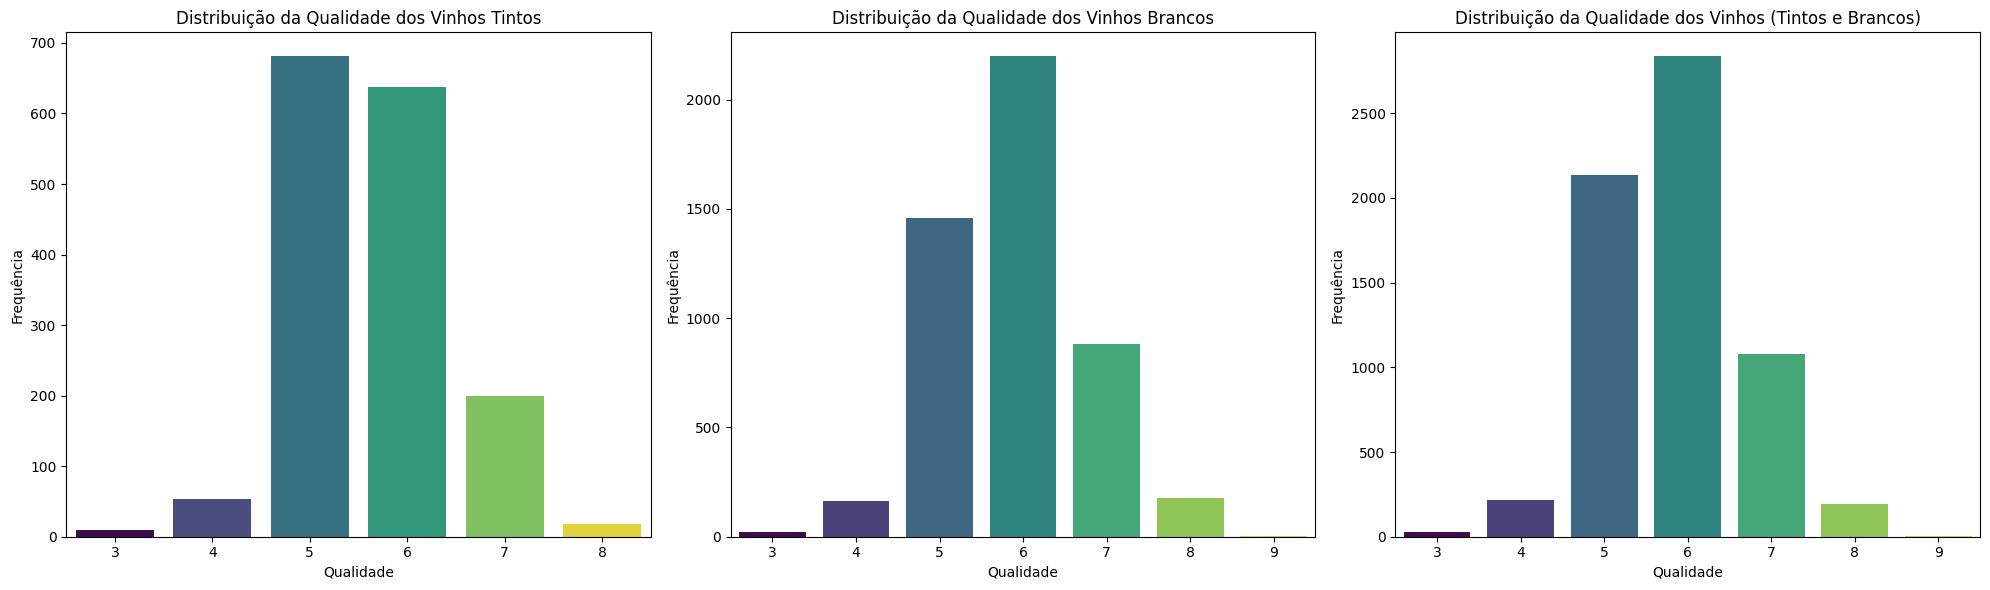

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(x=df_red["quality"], hue=df_red["quality"], palette="viridis", ax=axes[0], legend=False)
axes[0].set_title("Distribuição da Qualidade dos Vinhos Tintos")
axes[0].set_xlabel("Qualidade")
axes[0].set_ylabel("Frequência")

sns.countplot(x=df_white["quality"], hue=df_white["quality"], palette="viridis", ax=axes[1], legend=False)
axes[1].set_title("Distribuição da Qualidade dos Vinhos Brancos")
axes[1].set_xlabel("Qualidade")
axes[1].set_ylabel("Frequência")

sns.countplot(x=wine_data["quality"], hue=wine_data["quality"], palette="viridis", ax=axes[2], legend=False)
axes[2].set_title("Distribuição da Qualidade dos Vinhos (Tintos e Brancos)")
axes[2].set_xlabel("Qualidade")
axes[2].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

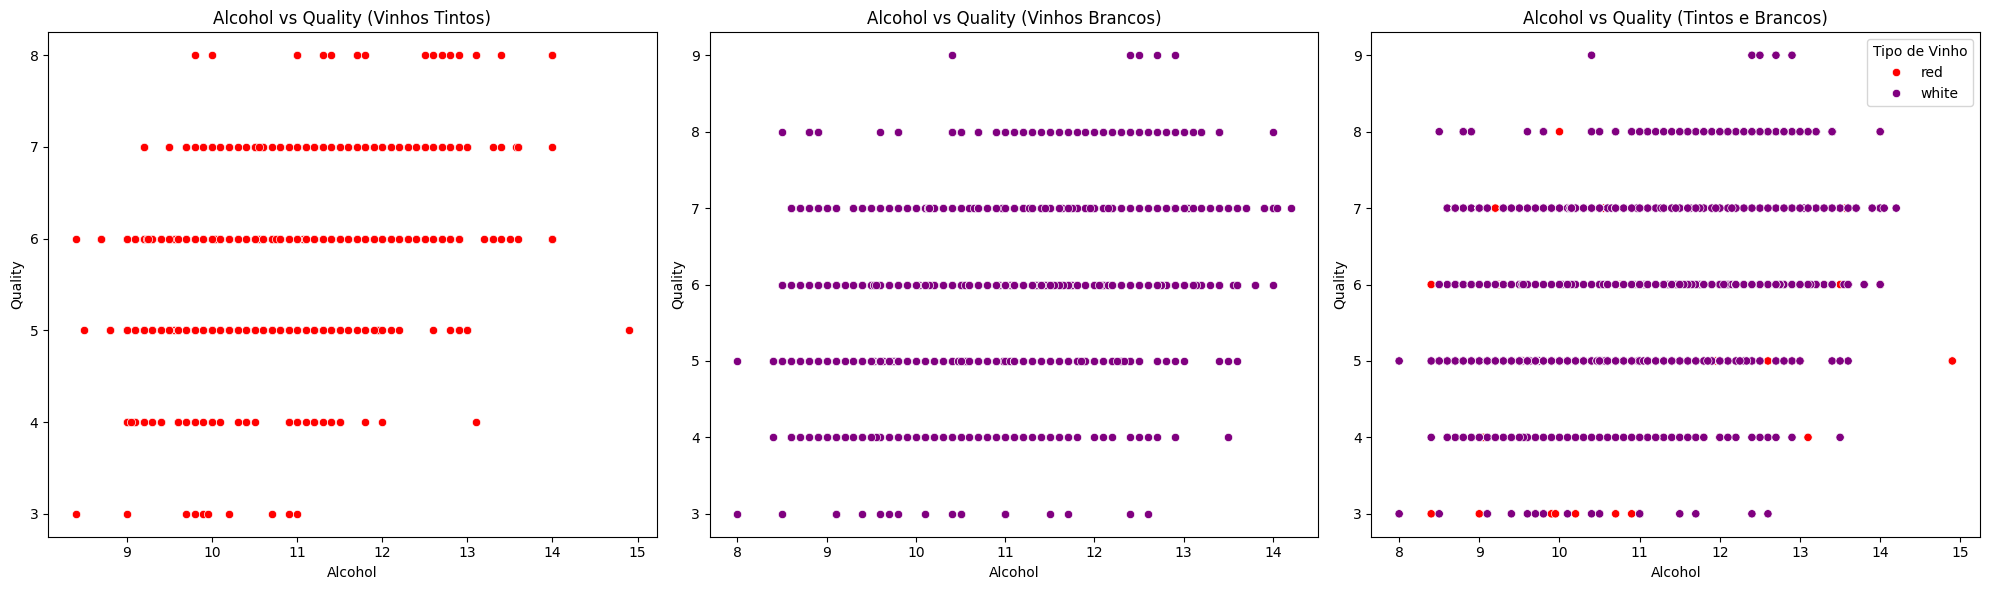

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(x=df_red["alcohol"], y=df_red["quality"], color="red", ax=axes[0])
axes[0].set_title("Alcohol vs Quality (Vinhos Tintos)")
axes[0].set_xlabel("Alcohol")
axes[0].set_ylabel("Quality")

sns.scatterplot(x=df_white["alcohol"], y=df_white["quality"], color="purple", ax=axes[1])
axes[1].set_title("Alcohol vs Quality (Vinhos Brancos)")
axes[1].set_xlabel("Alcohol")
axes[1].set_ylabel("Quality")

sns.scatterplot(x="alcohol", y="quality", hue="wine_type", data=wine_data, palette={"red": "red", "white": "purple"}, ax=axes[2])
axes[2].set_title("Alcohol vs Quality (Tintos e Brancos)")
axes[2].set_xlabel("Alcohol")
axes[2].set_ylabel("Quality")
axes[2].legend(title="Tipo de Vinho")

plt.tight_layout()

plt.show()

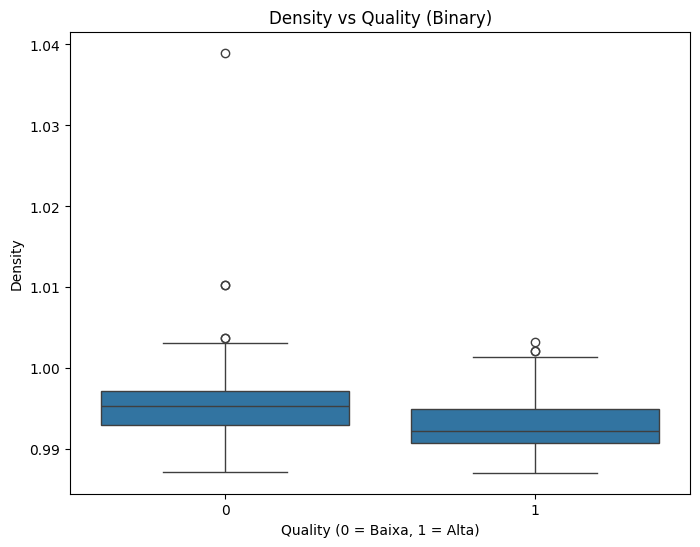

In [14]:
# Criar a variável binária de qualidade
wine_data['quality_binary'] = wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality_binary', y='density', data=wine_data)
plt.title('Density vs Quality (Binary)')
plt.xlabel('Quality (0 = Baixa, 1 = Alta)')
plt.ylabel('Density')
plt.show()

## Análise de correlação

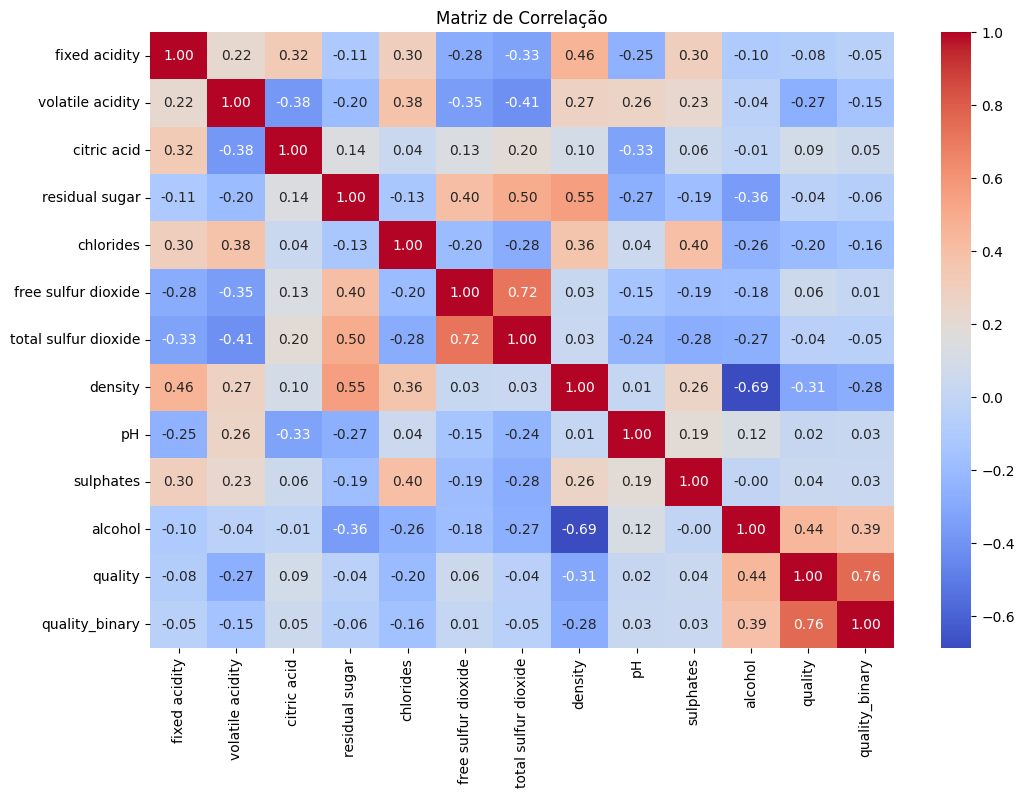

In [15]:
wine_data = wine_data.drop(columns=['wine_type'])

corr = wine_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## Normalizando e separando os dados em conjuntos de treino e teste

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Selecionar as variáveis independentes (features) e a variável dependente (target)
# Vamos usar todas as colunas, exceto 'quality' e 'type', como features
X = wine_data.drop(columns=['quality', 'quality_binary'])  # Variáveis independentes
y = wine_data['quality_binary']  # Variável dependente (binária: 0 ou 1)

# 2. Dividir o dataset em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizar as variáveis contínuas
# Criar um objeto StandardScaler
scaler = StandardScaler()

# Aplicar a normalização apenas nas variáveis contínuas (X_train e X_test)
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma o conjunto de treino
X_test_scaled = scaler.transform(X_test)  # Apenas transforma o conjunto de teste (não ajusta)

# 4. Verificar os resultados
print("Formato do conjunto de treino (X_train):", X_train.shape)
print("Formato do conjunto de teste (X_test):", X_test.shape)
print("\nPrimeiras 5 linhas do X_train normalizado:\n", X_train_scaled[:5])

Formato do conjunto de treino (X_train): (5197, 11)
Formato do conjunto de teste (X_test): (1300, 11)

Primeiras 5 linhas do X_train normalizado:
 [[-0.46822898 -0.59951186  0.20546655  0.4646116  -0.71280142  0.31165933
   0.34356569 -0.29614553 -0.16888369 -1.0832659   0.01376574]
 [ 0.85149992 -0.35284877  1.10406349 -0.70299854  1.06747    -1.4087346
  -1.84751841 -0.20307163  0.26967864  0.59857677  1.60871671]
 [ 0.38571325  2.32961232 -2.14471006 -0.70299854  0.2347624   0.02492701
  -1.29529396 -0.32606213  1.20945505  0.26220824  1.10504798]
 [-1.55506455  0.20214318  0.06722087 -0.89065017 -0.79894359 -1.00730935
  -0.61837367 -1.49280991  0.958848   -1.01599219  1.0211032 ]
 [-0.46822898 -0.47618032  1.65704622  2.07007555 -0.0810922   0.08227347
   0.45044784  1.1332036  -0.67009777 -0.27598142 -0.99357172]]


## Treinando modelo com Regressão Logística

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

logistic_model = LogisticRegression(random_state=42)

# treinar o modelo
logistic_model.fit(X_train_scaled, y_train)

# previsões
y_pred = logistic_model.predict(X_test_scaled)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics_dict = {
    "Métrica": ["Acurácia", "Precisão", "Revocação (Recall)", "F1-Score"],
    "Valor": [accuracy, precision, recall, f1]
}

metrics_df = pd.DataFrame(metrics_dict)

print(metrics_df.to_markdown(index=False))

| Métrica            |    Valor |
|:-------------------|---------:|
| Acurácia           | 0.824615 |
| Precisão           | 0.607143 |
| Revocação (Recall) | 0.269841 |
| F1-Score           | 0.373626 |


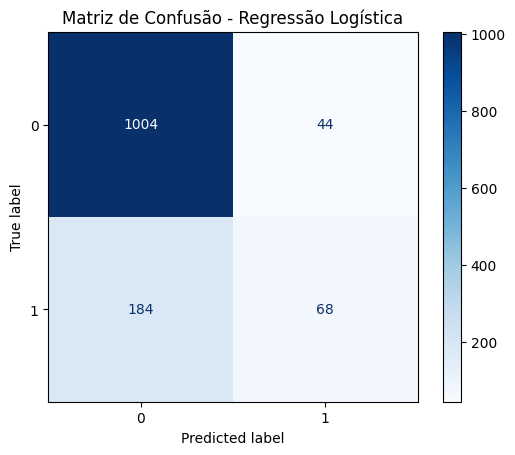

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

## Treinando modelo com Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

random_forest_model = RandomForestClassifier(random_state=42)

# treinar o modelo
random_forest_model.fit(X_train_scaled, y_train)

# previsões
y_pred_rf = random_forest_model.predict(X_test_scaled)

In [21]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

metrics_dict_rf = {
    "Métrica": ["Acurácia", "Precisão", "Revocação (Recall)", "F1-Score"],
    "Valor": [accuracy_rf, precision_rf, recall_rf, f1_rf]
}

metrics_df_rf = pd.DataFrame(metrics_dict_rf)
print(metrics_df_rf.to_markdown(index=False))

| Métrica            |    Valor |
|:-------------------|---------:|
| Acurácia           | 0.888462 |
| Precisão           | 0.789189 |
| Revocação (Recall) | 0.579365 |
| F1-Score           | 0.668192 |


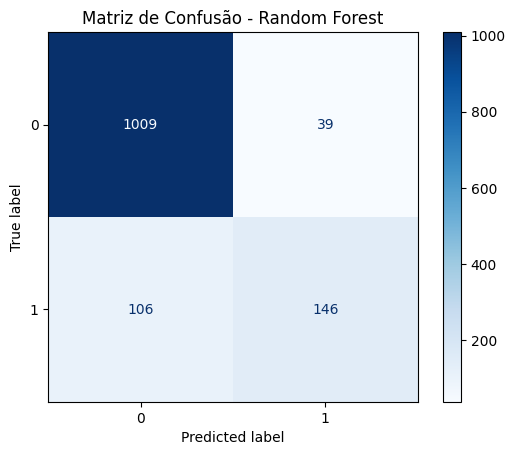

In [22]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

## Treinando modelo com Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

svm_model = SVC(random_state=42)

# treinar o modelo
svm_model.fit(X_train_scaled, y_train)

# previsões
y_pred_svm = svm_model.predict(X_test_scaled)

In [24]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

metrics_dict_svm = {
    "Métrica": ["Acurácia", "Precisão", "Revocação (Recall)", "F1-Score"],
    "Valor": [accuracy_svm, precision_svm, recall_svm, f1_svm]
}

metrics_df_svm = pd.DataFrame(metrics_dict_svm)
print(metrics_df_svm.to_markdown(index=False))

| Métrica            |    Valor |
|:-------------------|---------:|
| Acurácia           | 0.836923 |
| Precisão           | 0.708333 |
| Revocação (Recall) | 0.269841 |
| F1-Score           | 0.390805 |


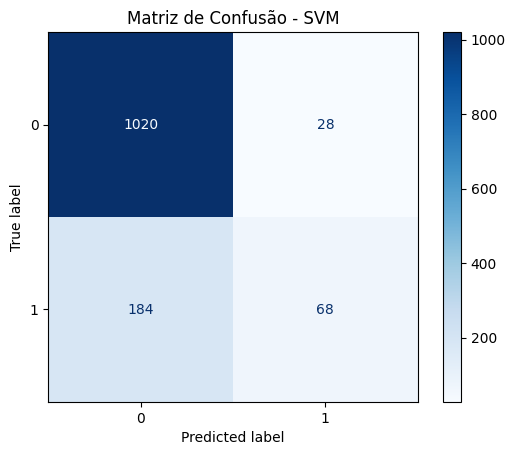

In [25]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - SVM")
plt.show()

## Comparando os modelos utilizando a curva ROC-AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Obter as probabilidades de previsão para a classe positiva (quality_binary = 1)
y_pred_prob_lr = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Regressão Logística
y_pred_prob_rf = random_forest_model.predict_proba(X_test_scaled)[:, 1]  # Random Forest
y_pred_prob_svm = svm_model.decision_function(X_test_scaled)  # SVM (usa decision_function)

# 2. Calcular a curva ROC e a AUC para cada modelo
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

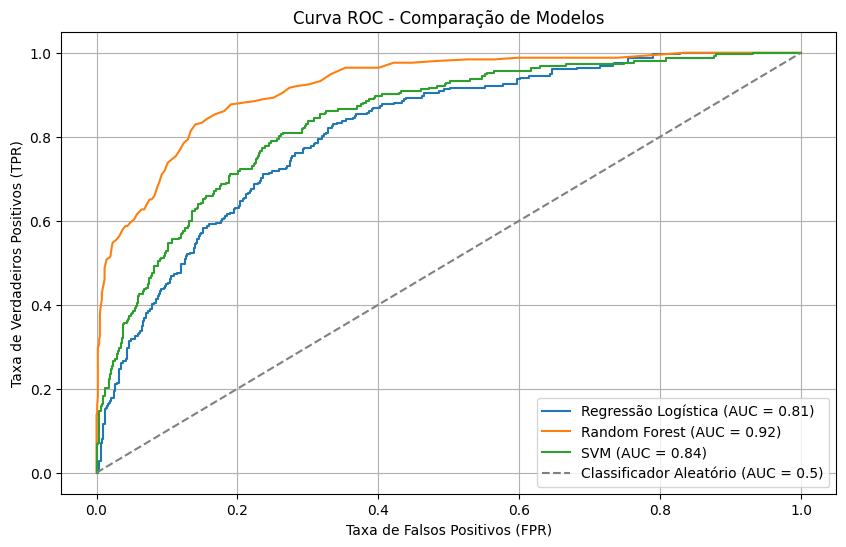

In [ ]:
import matplotlib.pyplot as plt

# Plotar as curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Regressão Logística (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")

# Adicionar a linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Classificador Aleatório (AUC = 0.5)")

# Configurações do gráfico
plt.title("Curva ROC - Comparação de Modelos")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Utilizando GridSearchCV ou RandomizedSearchCV para encontrar os melhores hiperparâmetros.

### Regressão Logística

In [26]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a serem testados
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'penalty': ['l1', 'l2'],  # Tipo de regularização
    'solver': ['liblinear']  # Algoritmo de otimização (suporta L1 e L2)
}

# Criar o GridSearchCV para Regressão Logística
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')

# Ajustar o GridSearchCV aos dados de treino
grid_search_lr.fit(X_train_scaled, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros para Regressão Logística:", grid_search_lr.best_params_)

# Treinar o modelo com os melhores hiperparâmetros
best_lr_model = grid_search_lr.best_estimator_

Melhores hiperparâmetros para Regressão Logística: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


### Random Forest

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir os hiperparâmetros a serem testados
param_dist_rf = {
    'n_estimators': randint(50, 200),  # Número de árvores
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima das árvores
    'min_samples_split': randint(2, 20),  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': randint(1, 20)  # Número mínimo de amostras em uma folha
}

# Criar o RandomizedSearchCV para Random Forest
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Ajustar o RandomizedSearchCV aos dados de treino
random_search_rf.fit(X_train_scaled, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros para Random Forest:", random_search_rf.best_params_)

# Treinar o modelo com os melhores hiperparâmetros
best_rf_model = random_search_rf.best_estimator_

Melhores hiperparâmetros para Random Forest: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}


### SVM

In [28]:
# Definir os hiperparâmetros a serem testados
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'kernel': ['linear', 'rbf'],  # Tipo de kernel
    'gamma': ['scale', 'auto']  # Coeficiente do kernel
}

# Criar o GridSearchCV para SVM
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=5, scoring='accuracy')

# Ajustar o GridSearchCV aos dados de treino
grid_search_svm.fit(X_train_scaled, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros para SVM:", grid_search_svm.best_params_)

# Treinar o modelo com os melhores hiperparâmetros
best_svm_model = grid_search_svm.best_estimator_

KeyboardInterrupt: 

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Função para calcular e exibir as métricas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Avaliar os modelos otimizados
accuracy_lr_opt, precision_lr_opt, recall_lr_opt, f1_lr_opt = evaluate_model(best_lr_model, X_test_scaled, y_test)
accuracy_rf_opt, precision_rf_opt, recall_rf_opt, f1_rf_opt = evaluate_model(best_rf_model, X_test_scaled, y_test)
# accuracy_svm_opt, precision_svm_opt, recall_svm_opt, f1_svm_opt = evaluate_model(best_svm_model, X_test_scaled, y_test)

# Exibir as métricas dos modelos otimizados
print("Métricas dos Modelos Otimizados:")
print("Regressão Logística - Acurácia:", accuracy_lr_opt, "Precisão:", precision_lr_opt, "Revocação:", recall_lr_opt, "F1-Score:", f1_lr_opt)
print("Random Forest - Acurácia:", accuracy_rf_opt, "Precisão:", precision_rf_opt, "Revocação:", recall_rf_opt, "F1-Score:", f1_rf_opt)
# print("SVM - Acurácia:", accuracy_svm_opt, "Precisão:", precision_svm_opt, "Revocação:", recall_svm_opt, "F1-Score:", f1_svm_opt)

Métricas dos Modelos Otimizados:
Regressão Logística - Acurácia: 0.8276923076923077 Precisão: 0.648936170212766 Revocação: 0.24206349206349206 F1-Score: 0.35260115606936415
Random Forest - Acurácia: 0.8730769230769231 Precisão: 0.7806451612903226 Revocação: 0.4801587301587302 F1-Score: 0.5945945945945946


In [30]:
# Métricas dos modelos originais (antes da otimização)
print("\nMétricas dos Modelos Originais:")
print("Regressão Logística - Acurácia:", accuracy, "Precisão:", precision, "Revocação:", recall, "F1-Score:", f1)
print("Random Forest - Acurácia:", accuracy_rf, "Precisão:", precision_rf, "Revocação:", recall_rf, "F1-Score:", f1_rf)
# print("SVM - Acurácia:", accuracy_svm, "Precisão:", precision_svm, "Revocação:", recall_svm, "F1-Score:", f1_svm)


Métricas dos Modelos Originais:
Regressão Logística - Acurácia: 0.8246153846153846 Precisão: 0.6071428571428571 Revocação: 0.2698412698412698 F1-Score: 0.37362637362637363
Random Forest - Acurácia: 0.8884615384615384 Precisão: 0.7891891891891892 Revocação: 0.5793650793650794 F1-Score: 0.6681922196796338


### Discussão dos Resultados  

#### Qual modelo teve melhor desempenho?  

O **Random Forest** foi o melhor modelo, porque teve a maior **acurácia** (0.888 antes da otimização e 0.873 depois) e conseguiu prever melhor quais vinhos eram de alta qualidade. Além disso, teve a melhor combinação entre precisão e revocação, ou seja, conseguiu encontrar mais vinhos de qualidade sem errar tanto.  

O **SVM** teve um desempenho intermediário, mas sua revocação foi bem baixa (0.269), o que significa que ele deixou passar muitos vinhos de alta qualidade sem identificá-los corretamente.  

A **Regressão Logística** foi o modelo mais fraco, principalmente porque teve a menor revocação (0.269 antes da otimização e 0.242 depois). Isso mostra que ele não conseguiu capturar bem os vinhos de qualidade alta e acabou classificando vários deles como de qualidade baixa.  

O **Random Forest se saiu melhor porque combina várias árvores de decisão**, o que o torna mais confiável e capaz de capturar padrões complexos nos dados. Já a regressão logística tenta encontrar uma relação mais simples entre as variáveis e pode não ser suficiente para um problema como esse.  

---

#### Quais variáveis mais influenciaram na qualidade do vinho?  

Algumas características do vinho que mais influenciaram na qualidade foram:  

- **Teor alcoólico**: Vinhos com mais álcool geralmente são considerados de melhor qualidade.  
- **Acidez volátil**: Se for muito alta, pode indicar menor qualidade, pois pode dar um gosto ruim ao vinho.  
- **Densidade**: Está ligada ao teor alcoólico e ao açúcar residual, influenciando o sabor e a textura do vinho.  
- **Cloretos**: Relacionados à quantidade de sal no vinho. Se forem altos, podem prejudicar o sabor.  
- **Dióxido de enxofre (SO2 livre e total)**: Ajuda a conservar o vinho, mas em excesso pode prejudicar o aroma.  

Em resumo, o modelo de **Random Forest conseguiu entender melhor esses fatores e como eles influenciam a qualidade do vinho**, enquanto a **Regressão Logística teve mais dificuldade** em capturar essas relações. O **SVM poderia ter um desempenho melhor se tivesse sido ajustado corretamente**, mas como demorou muito para rodar a otimização, não foi testado com os melhores parâmetros.